**AIRLINE TICKET PRICE PREDICTION**

**PROBLEM** **UNDERSTANDING**

•Analyse Data & Extract meaningful insights from it.

•Predict the Fare of Airlines on different Source, Destination, Arrival Time, Departure Time, Date of Journey, Duration, Airline, Total Stops etc.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**DATA** **COLLECTION**

In [ ]:
train_data=pd.read_excel('/content/Data_Train.xlsx')


In [ ]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


**DATA CLEANING /DATA PREPARATION**



*   Checking missing values in data




In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [ ]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


**Problem 1:Change the datatype of 'Date_of_Journey', 'Dep_Time' and 'Arrival_Time' to DateTime**

In [ ]:
data=train_data.copy()

In [ ]:
data.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
def change_into_Datetime(col):
  data[col]=pd.to_datetime(data[col])

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
for feature in ['Dep_Time','Arrival_Time','Date_of_Journey']:
  change_into_Datetime(feature)


In [ ]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

**3 Features added**

In [ ]:
data['Journey_day']=data['Date_of_Journey'].dt.day

In [ ]:
data['Journey_month']=data['Date_of_Journey'].dt.month

In [ ]:
data['Journey_year']=data['Date_of_Journey'].dt.year

In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-21 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-21 05:50:00,2023-10-21 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-21 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019


In [ ]:
def extract_hour_min(df,col):
  df[col+'_hour']=df[col].dt.hour
  df[col+'_minute']=df[col].dt.minute
  return df.head(3)

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [ ]:
extract_hour_min(data,'Dep_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-21 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-21 05:50:00,2023-10-21 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-21 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25


In [ ]:
extract_hour_min(data,'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-21 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-21 05:50:00,2023-10-21 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-21 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [ ]:
cols_to_drop=['Arrival_Time','Dep_Time']          #since now of no use
data.drop(cols_to_drop,axis=1,inplace=True)

In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [ ]:
data.shape                #no. of rows and col

(10682, 16)

In [ ]:
def flight_dep_time(x):
  if(x>4)and (x<=8):
    return "Early Morning"
  elif(x>8)and (x<=12):
    return "Morning"
  elif(x>12)and (x<=16):
    return "Noon"
  elif(x>16)and (x<=20):
    return "Evening"
  elif(x>20)and (x<=24):
    return "Night"
  else:
    return "Late Night"

**Data Vizualization**

<Axes: >

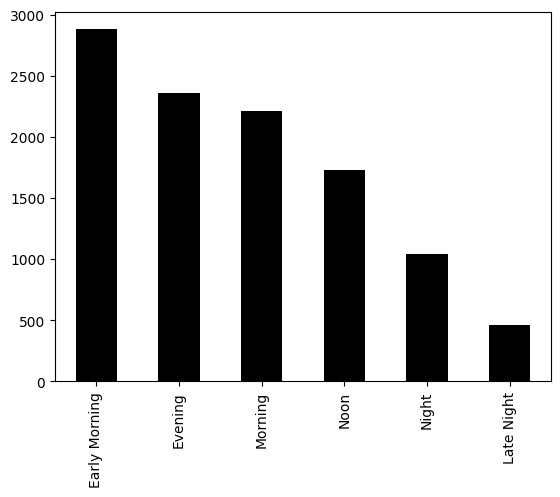

In [ ]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar',color='black')

In [ ]:
# !pip install plotly
# !pip install chart_studio

In [ ]:
#!pip install cufflinks

In [ ]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot ,iplot,init_notebook_mode,download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
#data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar',color='black')

**Preprocessing the data => For Duration (0 h 0
m)**

In [ ]:
def preprocess_duration(x):
  if 'h' not in x:
    x='0h' + ' ' + x
  elif 'm' not in x:
    x= x + ' ' + '0m'
  return x



In [ ]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [ ]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [ ]:
data['Duration'][0]

'2h 50m'

In [ ]:
'2h 50m'.split(' ')

['2h', '50m']

In [ ]:
'2h 50m'.split(' ')[0]

'2h'

In [ ]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [ ]:
int('2h 50m'.split(' ')[0][0:-1])
int('2h 50m'.split(' ')[1][0:-1])

50

In [ ]:
data['Duration_hours']=data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [ ]:
data['Duration_mins']=data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25


**DATA ANALYSIS**

**Will duration have an impact on price?**

In [ ]:
2*60

120

In [ ]:
eval('2*60')     #evaluates operations on string    2h 50m -> 2*60+50*1 m

120

In [ ]:
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [ ]:
data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

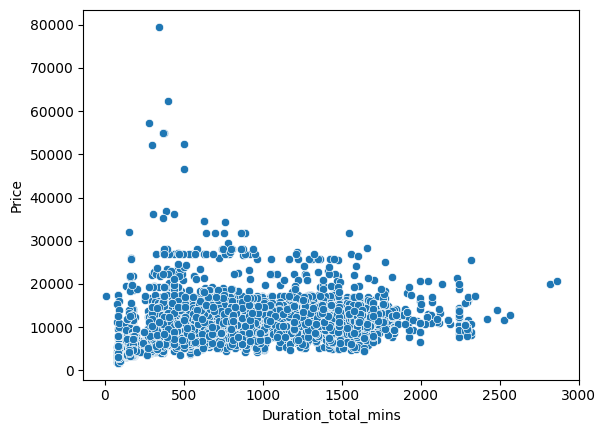

In [ ]:
sns.scatterplot(x='Duration_total_mins',y='Price',data=data)             #since duration and price are continuous ,the result is continuous and hence scatterplot or regression plot can be used

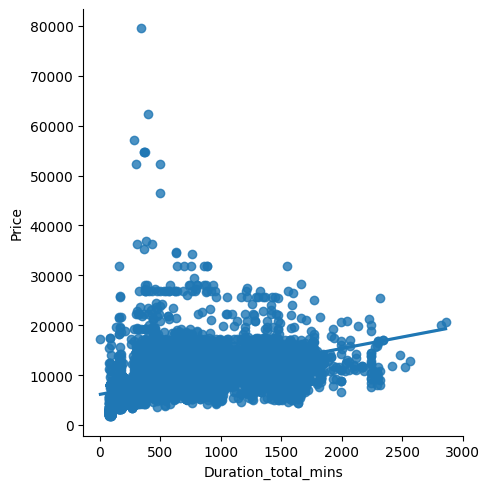

In [ ]:
sns.lmplot(x='Duration_total_mins',y='Price',data=data)      #regression plot  as duration increases price increases

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

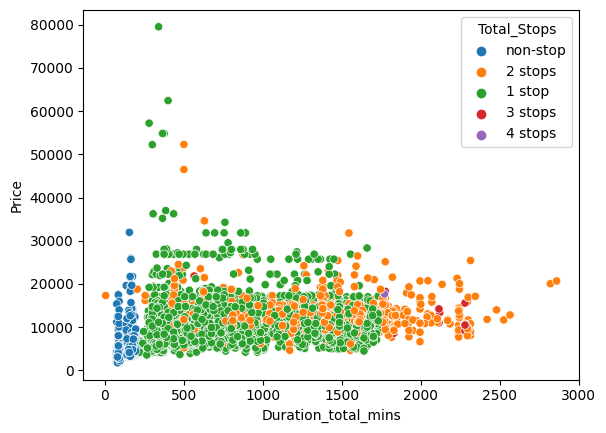

In [ ]:
sns.scatterplot(x='Duration_total_mins',y='Price',hue='Total_Stops',data=data)

**Airline V/S Price Analysis**

In [ ]:
data['Airline']=='Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

**On which route Jet Airways is extremely used?**

In [ ]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

Airline v/s Price Analysis can be done using min price,25th percentile price,median(50th percentile value),mean,75th percentile price,max price ,etc    -> Box Plot / Whiskers Plot

<Axes: xlabel='Airline', ylabel='Price'>

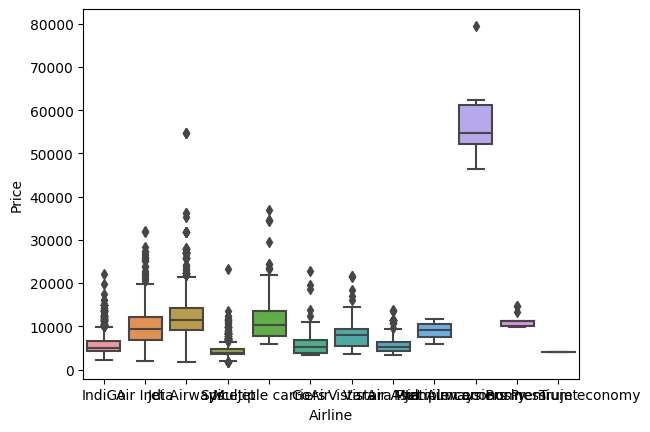

In [ ]:
sns.boxplot(x='Airline',y='Price',data=data)

Rotating x-ticks

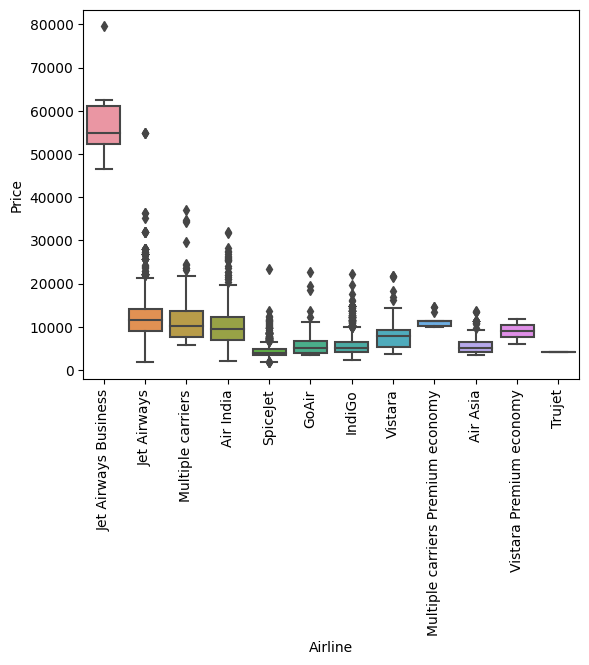

In [ ]:
sns.boxplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False))             #quartile upper and lower & median
plt.xticks(rotation='vertical')
plt.show()

**FEATURE ENGINEERING**

Converting categorical data(datatpye as object) into numerical data(datatype as int) is feature encoding

Applying **one hot encoding** on Source (for nominal data) and **Label encoding** (for ordinal data)

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

In [ ]:
cat_col=[col for col in data.columns if data[col].dtype=='Object']

In [ ]:
num_col=[col for col in data.columns if data[col].dtype!='Object']

In [ ]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

**IMP: One hot encoding from scratch**

In [ ]:
data['Source'].apply(lambda x:1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

**IMP: Implementation**

In [ ]:
for sub_category in data['Source'].unique():
  data['Source_'+sub_category]=data['Source'].apply(lambda x:1 if x==sub_category else 0)

In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


Feature encoding on Airline feature

In [ ]:
data['Airline'].nunique()            #curse of dimensionality since we end up getting 12 more features(subcategories) hence need of optimised encoding

12

**Perform target guided encoding on Data**

In [ ]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [ ]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [ ]:
dict_airlines={key:index for index,key in enumerate(airlines,0)}

In [ ]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [ ]:
data['Airline']=data['Airline'].map(dict_airlines)

In [ ]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


In [ ]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [ ]:
data['Destination']

0           Delhi
1        Banglore
2          Cochin
3        Banglore
4           Delhi
           ...   
10678    Banglore
10679    Banglore
10680       Delhi
10681       Delhi
10682      Cochin
Name: Destination, Length: 10682, dtype: object

In [ ]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [ ]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [ ]:
dict_dest={key:index for index,key in enumerate(dest,0)}

In [ ]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [ ]:
data['Destination']=data['Destination'].map(dict_dest)

In [ ]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


**Manual Encoding**


In [ ]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [ ]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
stop={'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4}      #disctionary

In [ ]:
data['Total_Stops']=data['Total_Stops'].map(stop)

In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [ ]:
data['Additional_Info'].value_counts()/len(data)*100          #78% data is of No info

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [ ]:
data.drop(columns=['Date_of_Journey','Additional_Info','Duration_total_mins','Source','Journey_year'],axis=1,inplace=True)

In [ ]:
data.drop(columns=['Route'],axis=1,inplace=True)

In [ ]:
data.head(3)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,19h 0m,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


In [ ]:
data.drop(columns=['Duration'],axis=1,inplace=True)

In [ ]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


**Outlier Detection and how to deal with it**

Values that are extremely low or extremely high.Outliers(applies to those features which are numeric in nature) impacts ML model

In [ ]:
def plot(df,col):
  fig,(ax1,ax2,ax3)=plt.subplots(3,1)
  sns.distplot(df[col],ax=ax1)
  sns.boxplot(df[col],ax=ax2)
  sns.distplot(df[col],ax=ax3,kde=False)   #histogram

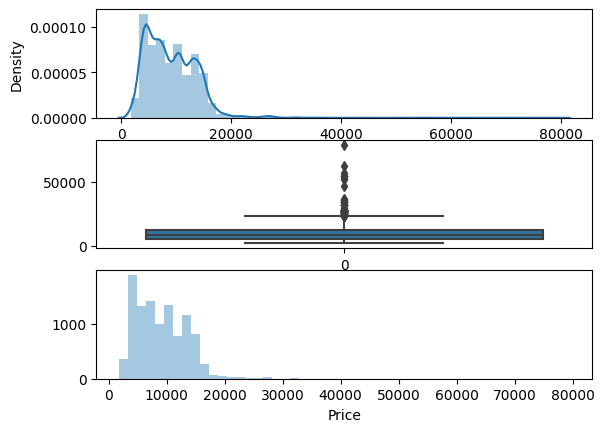

In [ ]:
plot(data,'Price')    #right skewed data as seen in plot1 bcoz of a lot of outliers

In [ ]:
q1=data['Price'].quantile(0.25)
q3=data['Price'].quantile(0.75)
iqr=q3-q1
maximum=q3+1.5*iqr
minimum=q1-1.5*iqr

In [ ]:
print(maximum)

23017.0


In [ ]:
print(minimum)

-5367.0


In [ ]:
print([price for price in data['Price'] if price>maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [ ]:
len([price for price in data['Price'] if price>maximum or price<minimum])   #no. of outlier with the median[Price]

94

In [ ]:
data['Price']=np.where(data['Price']>=35000 ,data['Price'].median(),data['Price'])   #less skewness in data as seen in plot1

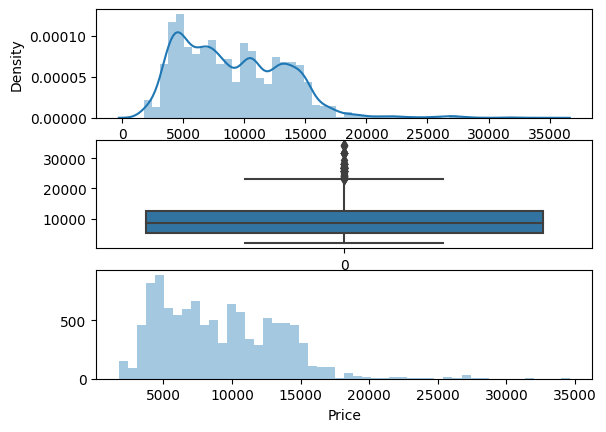

In [ ]:
plot(data,'Price')

**Feature Selection**

Selecting features that will contribute a lot in prediction of target value

Dependent feature=>Target, Rest all are independent features

In [ ]:
x=data.drop(['Price'],axis=1)

In [ ]:
y=data['Price']

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
imp=mutual_info_regression(x,y)

In [ ]:
imp_df=pd.DataFrame(imp,index=x.columns)

In [ ]:
imp_df.columns=['importance']

In [ ]:
imp_df

,importance
Airline,0.965291
Destination,1.008335
Total_Stops,0.798705
Journey_day,0.199439
Journey_month,0.237033
Dep_Time_hour,0.347993
Dep_Time_minute,0.257779
Arrival_Time_hour,0.404890
Arrival_Time_minute,0.350393
Duration_hours,0.464696


In [ ]:
imp_df.sort_values(by='importance',ascending=False)

,importance
Destination,1.008335
Airline,0.965291
Total_Stops,0.798705
Source_Delhi,0.520552
Duration_hours,0.464696
Source_Kolkata,0.452318
Arrival_Time_hour,0.404890
Source_Banglore,0.380399
Arrival_Time_minute,0.350393
Dep_Time_hour,0.347993


**Model Building**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
ml_model=RandomForestRegressor()

In [ ]:
ml_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=ml_model.predict(X_test)

In [ ]:
y_pred

array([16780.99 ,  6440.89 ,  8887.49 , ...,  3478.67 ,  6249.716,
        6963.87 ])

In [ ]:
from sklearn import metrics


**R2 score metric Random Forest 80.67% Accuracy**

In [ ]:
metrics.r2_score(y_test,y_pred)

0.8054423504717493

In [ ]:
import pickle

In [ ]:
file=open(r'rf_random.pk1','wb')

In [ ]:
pickle.dump(ml_model,file)

In [ ]:
model=open(r'rf_random.pk1','rb')

In [ ]:
forest=pickle.load(model)

In [ ]:
y_pred2=forest.predict(X_test)

In [ ]:
metrics.r2_score(y_test,y_pred2)

0.8054423504717493

**SVM Linear Kernel 58.75%**

In [ ]:
from sklearn import svm

In [ ]:
ml_model = svm.SVC(kernel='linear')
ml_model.fit(X_train, y_train)
y_pred = ml_model.predict(X_test)

In [ ]:
y_pred

array([15965.,  4959.,  8452., ...,  3419.,  6795.,  6818.])

In [ ]:
metrics.r2_score(y_test,y_pred)

0.5875094871296371

**SVM RBF Kernel 60.01%**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
ml_model = svm.SVC(kernel='rbf',gamma=0.1,C=10.0)
ml_model.fit(X_train, y_train)
y_pred = ml_model.predict(X_test)
y_pred
metrics.r2_score(y_test,y_pred)

0.6001681321490894

**Ridge Regression 55.57%**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model = Ridge(alpha = 0.5, tol = 0.001,solver ='auto', random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred
metrics.r2_score(y_test,y_pred)

0.5557140833156403

**KNN 51.14%**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred=neigh.predict(X_test)
y_pred
metrics.r2_score(y_test,y_pred)
#accuracy = accuracy_score(y_test,y_pred)
#accuracy*100

0.511418670731574

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.24260576563084987

**Defining my own evaluation metric(Mean Absolute % error)**

In [ ]:
def mape(y_true,y_pred):
  y_true,y_pred=np.array(y_true),np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [ ]:
mape(y_test,y_pred)

19.08275584763132

In [ ]:
from sklearn import metrics

In [ ]:
def predict(ml_model):
  model=ml_model.fit(X_train,y_train)
  print('Training score:{}'.format(model.score(X_train,y_train)))
  y_prediction=model.predict(X_test)
  print('Predictions are:{}'.format(y_prediction))
  print('\n')
  print('MAE:{}'.format(metrics.mean_absolute_error(y_test,y_prediction)))
  r2_score=metrics.r2_score(y_test,y_prediction)
  print('r2_score:{}'.format(r2_score))
  print('MSE:{}'.format(metrics.mean_squared_error(y_test,y_prediction)))
  print('RMSE:{}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_prediction))))
  print('MAPE:{}'.format(mape(y_test,y_prediction)))
  sns.distplot(y_test-y_prediction)

Training score:0.9519336199794155
Predictions are:[16622.21  6253.94  8827.27 ...  3502.26  6066.69  7016.3 ]


MAE:1189.1934175007987
r2_score:0.8038827363786102
MSE:3817932.375660843
RMSE:1953.9530126543073
MAPE:13.322284258574415


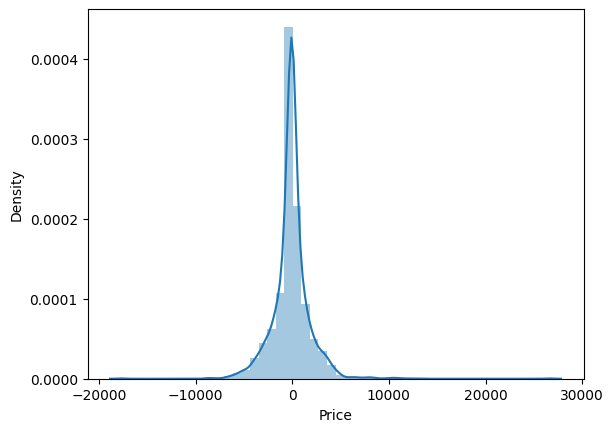

In [ ]:
predict(RandomForestRegressor())

Training score:0.966591628243878
Predictions are:[16840.  6976.  8610. ...  3419.  5797.  6818.]


MAE:1359.3579807812307
r2_score:0.706583658571198
MSE:5712111.870231083
RMSE:2390.0024833106518
MAPE:15.08629707321156


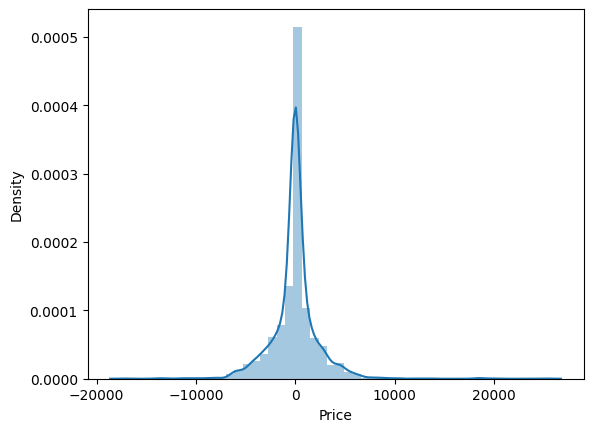

In [ ]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor())

**Hypertuning the ML Model**

Dictionary of Hyperparamter=>Hyperparameter space

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
reg_rf=RandomForestRegressor()

In [ ]:
np.linspace(start=100,stop=1200,num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]
min_samples_split=[5,10,15,100]


In [ ]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [ ]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [ ]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,n_jobs=-1,verbose=2)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [ ]:
rf_random.best_params_


{'n_estimators': 760,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [ ]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=13, max_features='auto', min_samples_split=10,
                      n_estimators=760)

**Random forest accuracy after hypertuning is 81.63%**

In [ ]:
rf_random.best_score_

0.8199846405199395